In [54]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)
import pandas as pd
import numpy as np
import scipy.optimize

In [55]:
# Import our data
df = pd.read_csv("data.csv")
df

,temp_c,res_kohm
0,30.3,8.39
1,11.4,16.45
2,13.0,15.00
3,13.8,14.15
4,15.5,13.55
...,...,...
104,27.9,8.76
105,30.7,7.99
106,30.0,8.10
107,30.2,8.14


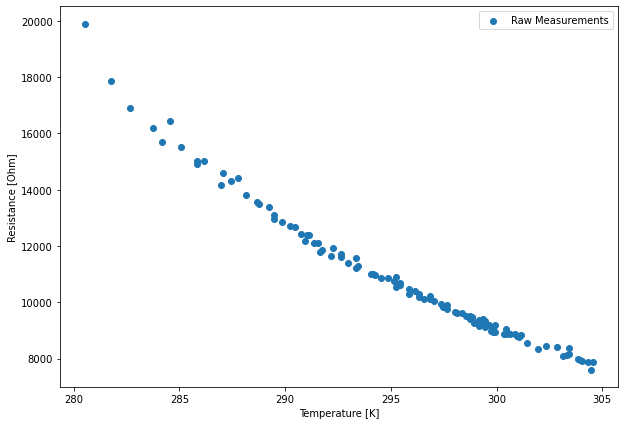

In [56]:
# Extract and convert data to useful units
temp_c = df["temp_c"]
res_kohm = df["res_kohm"]

temp_k = temp_c + 273.15
res_ohm = res_kohm*1000
plt.scatter(temp_k, res_ohm, label="Raw Measurements")
plt.xlabel("Temperature [K]")
plt.ylabel("Resistance [Ohm]")
plt.legend()

The fitting function we will use is:
$$\ln R = \frac{B}{T} + \ln r_\infty$$

We want to solve for $B$ and $r_\infty$.
https://en.wikipedia.org/wiki/Thermistor#B_or_%CE%B2_parameter_equation


In [57]:
def fit_func(T, B, ln_r_inf):
    return B/T + ln_r_inf

In [58]:
# Fit curve and extract values
popt, _ = scipy.optimize.curve_fit(fit_func, temp_k, np.log(res_ohm))
B , ln_r_inf = popt
r_inf = np.exp(ln_r_inf)
B, r_inf

(3084.4061812972204, 0.3100372265380624)

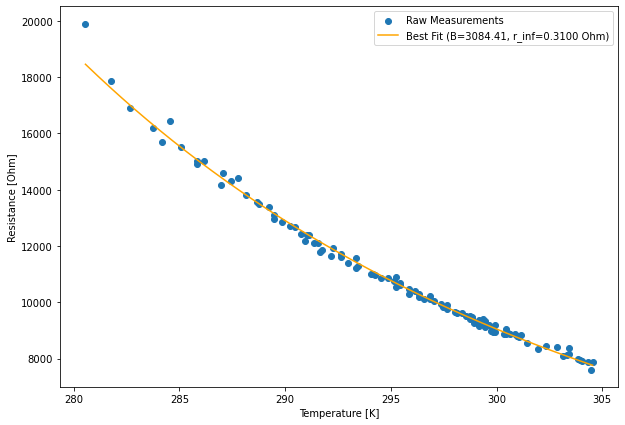

In [62]:
# Check fit
def curve(T):
    return r_inf*np.exp(B/T)
T_curve = np.linspace(min(temp_k), max(temp_k), 1000)
plt.scatter(temp_k, res_ohm, label="Raw Measurements")
plt.plot(T_curve, curve(T_curve), color='orange', label=f"Best Fit (B={B:.2f}, r_inf={r_inf:.4f} Ohm)")
plt.xlabel("Temperature [K]") 
plt.ylabel("Resistance [Ohm]")
plt.legend()